In [ ]:
from google.colab import drive
import scipy
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
drive.mount("/content/gdrive")

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


2.1

dict_keys(['__header__', '__version__', '__globals__', 'geneNetwork_rawPCNCI'])


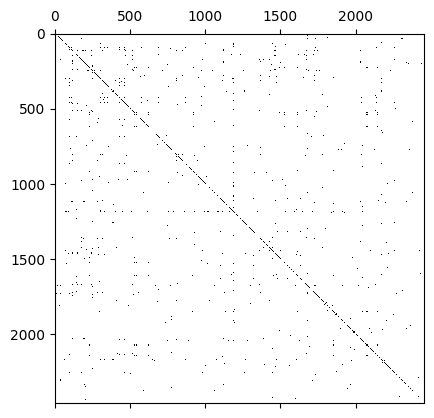

In [ ]:
gene_dataset_path = '/content/gdrive/MyDrive/ESE 224/lab13_data/geneNetwork_rawPCNCI.mat'
data = scipy.io.loadmat(gene_dataset_path)
print(data.keys())
adj_matrix = data['geneNetwork_rawPCNCI']
plt.spy(adj_matrix) 

In [ ]:
degree_matrix = np.diag(np.sum(adj_matrix, axis=0))
laplacian_matrix = degree_matrix - adj_matrix

[[ 3  0  0 ...  0  0  0]
 [ 0 12  0 ...  0  0  0]
 [ 0  0 21 ...  0  0  0]
 ...
 [ 0  0  0 ... 10  0  0]
 [ 0  0  0 ...  0  8  0]
 [ 0  0  0 ...  0  0  0]]


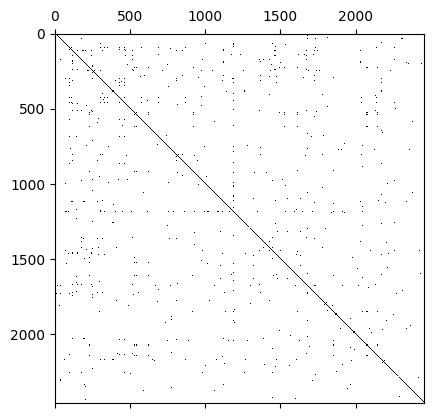

In [ ]:
print(laplacian_matrix)
plt.spy(laplacian_matrix) 

2.2

/usr/local/lib/python3.9/dist-packages/matplotlib/cbook/__init__.py:1335: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


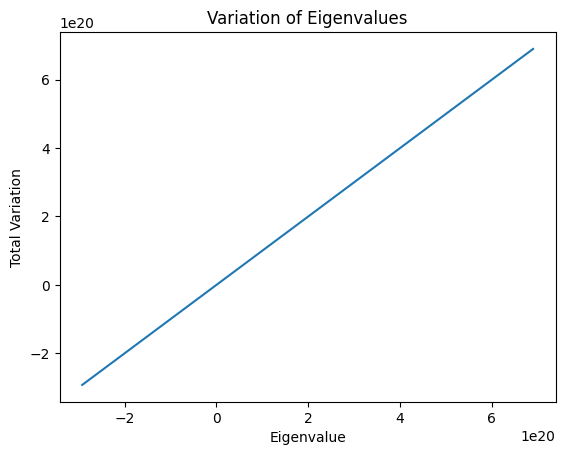

In [ ]:
def totalVariation(x, S):
    return x.T@(S)@x

S = laplacian_matrix
[eigs,V]=np.linalg.eig(S)
V=V[:,np.argsort(eigs)]
eigs=np.sort(eigs)

variation = np.diag(V.T @ S @ V)
#print(abs(variation))
plt.plot(eigs, variation)
plt.title('Variation of Eigenvalues')
plt.xlabel('Eigenvalue')
plt.ylabel('Total Variation')
plt.show()

In [ ]:
print(totalVariation(V[0],S))

(1.827507383843139e+18-57592.29626205658j)


3.1

In [ ]:
signal_mutation_path = "/content/gdrive/MyDrive/ESE 224/lab13_data/signal_mutation.mat"
s_data = scipy.io.loadmat(signal_mutation_path)

mutation_mtx = s_data["signal_mutation"]

histology_path = "/content/gdrive/MyDrive/ESE 224/lab13_data/histology_subtype.mat"
hist_data = scipy.io.loadmat(histology_path)

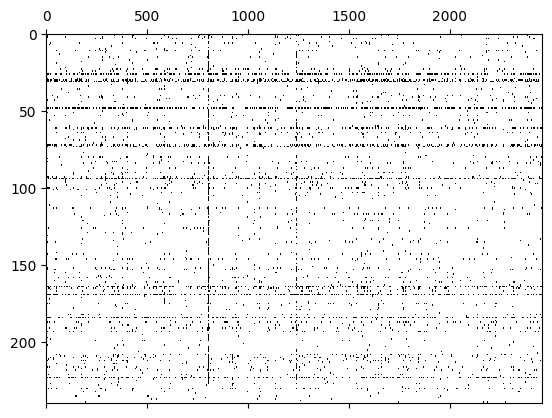

In [ ]:
plt.spy(mutation_mtx, aspect = 'auto')
hist_mtx = hist_data["histology_subtype"]

In [ ]:
hist_mtx[hist_mtx == 1]


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
      dtype=uint8)

In [ ]:
def computeGFT(x, V, k=None):
    xt=np.conj(V.T) @ x
    if k==None:
      return xt
    else:
      xtk = np.zeros_like(xt)
      xtk[np.argsort(np.abs(xt[:, 0]))[-k:], 0] = xt[np.argsort(np.abs(xt[:, 0]))[-k:], 0]
      return xtk


def laplacian(A):
  diagonal = []
  for i in range(240):
    degree = 0
    for j in A[i]:
      degree += j
    diagonal.append(degree)
  #print(diagonal)
  N = len(diagonal)
  L = np.zeros((N, N))
  for i in range(N):
    L[i, i] = diagonal[i]
  L = L - A
  return L

In [ ]:
V_hermitian = np.conj(V).transpose()
GFT = np.matmul(V_hermitian, np.transpose(mutation_mtx))

DP = np.zeros(2458)
histology_subtype = hist_data['histology_subtype']

In [ ]:
ones = []
twos = []
for i in range(240):
  if histology_subtype[i] == 1:
    ones.append(i)
  else:
    twos.append(i)
  
print(ones)
num_ones = len(ones)
num_twos = len(twos)
for k in range(2458):
  sum_ones = 0
  sum_twos = 0
  total = 0
  for i in ones:
    #print(i)
    n = GFT[k,i]
    #print(n.shape)
    sum_ones = sum_ones + n
    total = total + np.abs(n)

  for j in twos:  
    m = GFT[k,j]
    sum_twos = sum_twos + m
    total = total + np.abs(m)

  temp = np.abs((sum_ones/num_ones) - (sum_twos/num_twos))
  DP[k] = temp/total

[0, 17, 25, 27, 32, 33, 34, 35, 38, 39, 44, 45, 70, 71, 74, 75, 76, 77, 78, 79, 92, 110, 111, 118, 139, 145, 147, 176, 185, 187, 200, 201, 207, 228, 229, 231, 232, 233, 234, 235, 236, 237, 238, 239]


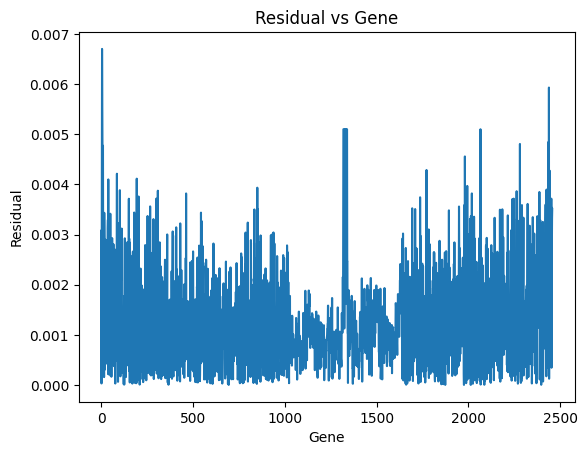

In [ ]:
indices = np.arange(len(DP))

plt.plot(indices, DP)
plt.xlabel('Gene')
plt.ylabel('Residual')
plt.title('Residual vs Gene')
plt.show()

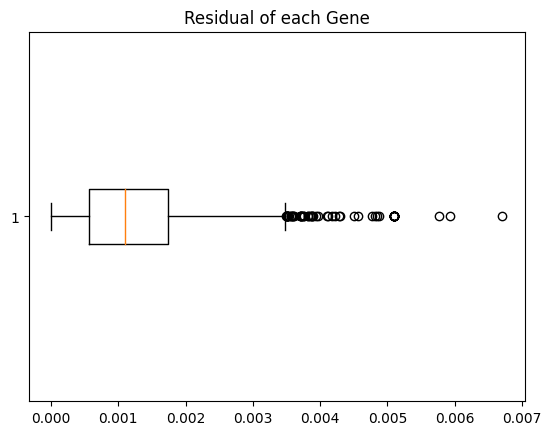

In [ ]:
plt.boxplot(DP, vert = False)
plt.title('Residual of each Gene')
plt.show()

In [ ]:
np.shape(hist_mtx)

(240, 1)

In [ ]:
import numpy as np
from scipy.spatial.distance import pdist, squareform
from scipy import stats as st

def kNN(sig, type, max_k):
    pd = squareform(pdist(sig))

    k = np.arange(1, max_k+1)
    acc = np.zeros(max_k)

    for i in range(max_k):
        z = np.zeros(len(type))
        for j in range(len(type)):
            nn = np.argsort(pd[:,j])
            z[j] = (st.mode(type[nn[2::i+1],:])).mode
        acc[i] = np.mean(z == type)

    return k, acc




In [ ]:
np.shape(mutation_mtx.shape)
np.shape(hist_mtx)

(240, 1)

In [ ]:
k, acc = kNN(mutation_mtx, hist_mtx, 7)
acc

<ipython-input-286-bd3fc911a8e4>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  z[j] = (st.mode(type[nn[2::i+1],:])).mode


array([0.81666667, 0.81666667, 0.81666667, 0.81666667, 0.81666667,
       0.81666667, 0.81666667])

<ipython-input-286-bd3fc911a8e4>:15: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  z[j] = (st.mode(type[nn[2::i+1],:])).mode


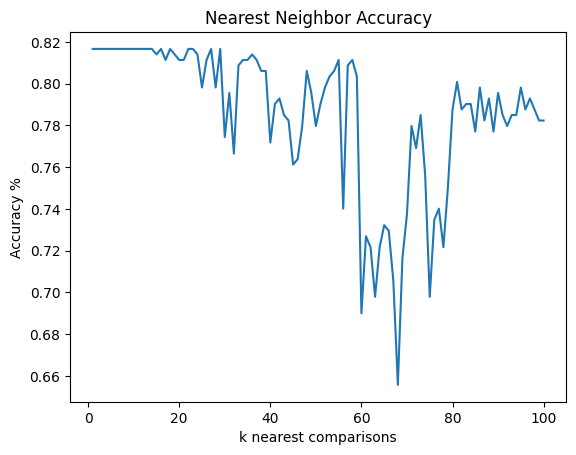

In [ ]:
k, acc = kNN(mutation_mtx, hist_mtx, 100)
plt.plot(k, acc)
plt.title('Nearest Neighbor Accuracy')
plt.xlabel('k nearest comparisons')
plt.ylabel('Accuracy %')
plt.show()

In [ ]:
k = np.argmax(GFT, axis=1)
H1 = np.zeros((240 ,2458))

for i in range(240):
    H1[i, k[i]] = 1

pgft = np.dot(GFT, H1)
psig = np.dot(pgft, V)
k,acc = kNN(psig, hist_mtx, 100)

plt.plot(k, acc)
plt.title('Nearest Neighbor Accuracy')
plt.xlabel('k nearest comparisons')
plt.ylabel('Accuracy %')
plt.show()